In [1]:
# Importando a biblioteca pandas
import pandas as pd

In [2]:
# leituras dos arquivos
df1 = pd.read_excel('dataset/Aracaju.xlsx')
df2 = pd.read_excel('dataset/Fortaleza.xlsx')
df3 = pd.read_excel('dataset/Natal.xlsx')
df4 = pd.read_excel('dataset/Recife.xlsx')
df5 = pd.read_excel('dataset/Salvador.xlsx')

In [3]:
# Juntando os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [4]:
# Mostrando os cincos primeiros dados da lista
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
# Mostrando os cincos últimos dados da lista
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [6]:
# Mostrando cincos dados aleatórios
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
139,Fortaleza,2019-03-02,141.16,980,7
29,Recife,2019-01-01,10.18,980,8
94,Recife,2019-01-01,24.70,982,3
108,Fortaleza,2019-03-02,152.89,981,4
100,Aracaju,2018-01-01,180.57,1520,6


In [7]:
# Visualizando os tipos de dados da tabela
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [8]:
# Alterando o tipo de dado da loja
df['LojaID'] = df['LojaID'].astype('object')

In [9]:
# Visualizando os tipos de dados da tabela
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [10]:
# Consultando
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

### Criando novas colunas

In [11]:
df['Receitas'] = df['Vendas'].mul(df['Qtde'])

In [12]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [13]:
df['Receitas'].max()

3544.0

In [14]:
df['Receitas'].min()

3.34

In [15]:
# Retornando as 3 maiores receitas
df.nlargest(3,'Receitas')

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [16]:
# Retornando as 3 menores receitas
df.nsmallest(3,'Receitas')

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [17]:
# Ordenando o conjunto de valores
df.sort_values('Receitas', ascending=False).head(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0


### Trabalhando com Datas

In [18]:
# Transformando a coluna de data em tipo inteiro
df['Data'] = df['Data'].astype('int64')

In [19]:
# Verificando o tipo de dado de cada coluna
df.dtypes

Cidade       object
Data          int64
Vendas      float64
LojaID       object
Qtde          int64
Receitas    float64
dtype: object

In [20]:
# Transformando a coluna de data em data
df['Data'] = pd.to_datetime(df['Data'])

In [21]:
df.dtypes

Cidade              object
Data        datetime64[ns]
Vendas             float64
LojaID              object
Qtde                 int64
Receitas           float64
dtype: object

In [22]:
# Agrupamento por ano
df.groupby(df['Data'].dt.year)['Receitas'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receitas, dtype: float64

In [23]:
# Criando uma coluna nova chamada ano
df['Ano_Vendas'] = df['Data'].dt.year

In [24]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Vendas
109,Aracaju,2018-01-01,51.64,1523,5,258.20,2018
122,Aracaju,2018-01-01,38.49,1522,4,153.96,2018
117,Natal,2019-01-02,39.41,1034,1,39.41,2019
44,Recife,2019-01-01,142.21,983,8,1137.68,2019
133,Salvador,2019-03-02,153.71,1035,1,153.71,2019


In [25]:
# Extraido o mês e o dia
df['Mês'], df['Dia'] = df['Data'].dt.month, df['Data'].dt.day

In [26]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Vendas,Mês,Dia
128,Recife,2019-03-02,38.70,982,4,154.80,2019,3,2
188,Salvador,2019-01-02,178.11,1035,3,534.33,2019,1,2
212,Salvador,2019-01-02,50.73,1037,3,152.19,2019,1,2
135,Natal,2019-01-02,9.95,1037,3,29.85,2019,1,2
202,Natal,2019-01-02,22.45,1036,1,22.45,2019,1,2


In [27]:
# Retornando a data mais antigo
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [28]:
# Calculando as diferenças de datas
df['Diferença_Dias'] = df['Data'] - df['Data'].min()

In [29]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Vendas,Mês,Dia,Diferença_Dias
82,Fortaleza,2019-01-01,14.03,1004,5,70.15,2019,1,1,365 days
43,Aracaju,2018-01-01,19.63,1523,9,176.67,2018,1,1,0 days
146,Natal,2019-01-02,149.88,1037,1,149.88,2019,1,2,366 days
22,Recife,2019-01-01,39.53,983,3,118.59,2019,1,1,365 days
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days


In [30]:
# Criando uma coluna trimestral
df['Trimestre'] = df['Data'].dt.quarter

In [31]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Vendas,Mês,Dia,Diferença_Dias,Trimestre
71,Aracaju,2018-01-01,228.27,1523,6,1369.62,2018,1,1,0 days,1
196,Natal,2019-01-02,145.09,1036,2,290.18,2019,1,2,366 days,1
88,Salvador,2019-01-01,31.20,1036,1,31.20,2019,1,1,365 days,1
12,Natal,2019-02-02,709.00,853,3,2127.00,2019,2,2,397 days,1
30,Salvador,2019-01-01,47.96,1034,2,95.92,2019,1,1,365 days,1


In [32]:
# Filtrando o mês de março de 2019
vendas_marco_19 = df.loc[(df['Ano_Vendas'] == 2019) & (df['Mês'] == 3)]

In [33]:
vendas_marco_19.head(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Vendas,Mês,Dia,Diferença_Dias,Trimestre
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1


### Visualização de Dados

In [34]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

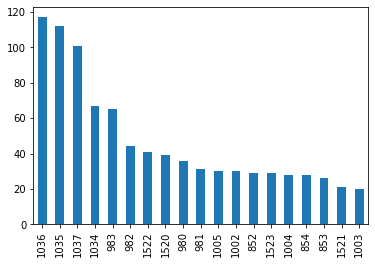

In [35]:
# Gerando um gráfico de barras
df['LojaID'].value_counts(ascending=False).plot.bar();

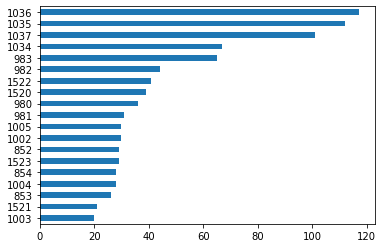

In [36]:
# Gerando um gráfico de barras horizontal
df['LojaID'].value_counts(ascending=True).plot.barh();

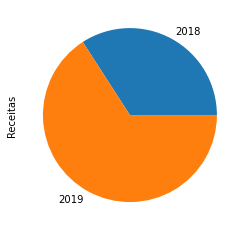

In [38]:
# Gerando um gráfico de pizza
df.groupby(df['Ano_Vendas'])['Receitas'].sum().plot.pie();

In [39]:
# Vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

In [40]:
# Importando a biblioteca matplotlib
import matplotlib.pyplot as plt

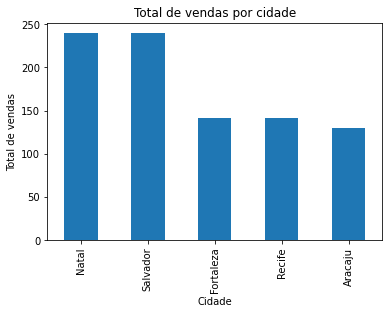

In [44]:
# Adicionando um título e alterando os nomes dos eixos
df['Cidade'].value_counts().plot.bar(title='Total de vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total de vendas');

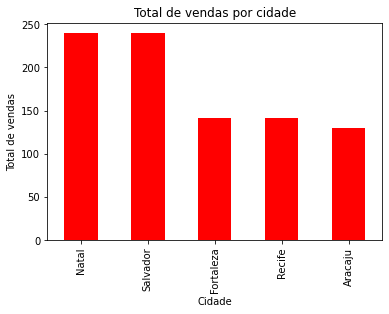

In [46]:
# Alterando a cor
# Adicionando um título e alterando os nomes dos eixos
df['Cidade'].value_counts().plot.bar(title='Total de vendas por cidade', color= 'red')
plt.xlabel('Cidade')
plt.ylabel('Total de vendas');

In [47]:
# Alterando o estilo
plt.style.use('ggplot')

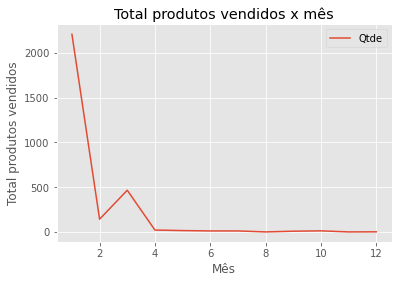

In [54]:
df.groupby(df['Mês'])['Qtde'].sum().plot(title='Total produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos')
plt.legend();